# Compte rendu projet numérique de mathématiques

In [1]:
#Prémilinaires
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display


def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f


def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def f(x, y):
    return np.sin(x) + 2.0 * np.sin(y)

grad_f = grad(f)

grad_f(0.0, 0.0) # array([1., 2.])

def f(x, y):
    return np.array([x + 2 * y, 3 * x + 4 * y])

J_f = J(f)

J_f(0.0, 0.0) # array([[1., 2.], [3., 4.]])

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 



N=100
eps=1e-10


## Question 1

On fixe $c \in \mathbb{R}$

Soit $ E_c =\{(x_1,x_2) \in \mathbb{R}^2 \; | \; f(x_1, x_2) = c\} $

On a $E_c=f^{-1}(\{c\})$, donc $E_c$ est l'image réciproque d'un singleton (donc fermé) par une fonction continue


**Donc $E_c$  est  fermé**   
  
  
  
  
Par ailleurs, $E_c$ est borné si $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$

En effet, par définition de la limite, on sait que $\exists A>0, \forall (x_1,x_2)\in \mathbb{R}^2, \|(x_1,x_2)\|>A \Rightarrow f(x_1, x_2)>c+1$

Donc $\forall (x_1,x_2)\in E_c, \|(x_1,x_2)\|\leqslant A$

Tout vecteur de $E_c$ est majoré

**Donc $E_c$  est  un  borné**

**Ainsi $E_c$  est  fermé et borné**   

## Question 2

$p(x_0)$ est le produit scalaire du vecteur unitaire 
$$
\overrightarrow{u} = \frac{1}{||\nabla f(x_0)||}\times rot_{-\frac{\pi}{2}}(\partial_1 f(x_0),\partial_2 f(x_0)) = \frac{1}{||\nabla f(x_0)||}\times (\partial_2 f(x_0),-\partial_1 f(x_0))
$$ 
où $rot_{-\frac{\pi}{2}}$ est la rotation d'angle $-\frac{\pi}{2}$ du plan, avec le vecteur 
$$
(x_1-x_{10},x_2-_{20})
$$
i.e. 
$$
p(x_0) = \overrightarrow{u}.(x_1-x_{10},x_2-_{20}) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20})
$$

## Question 3

on pose $x=(x_1,x_2)$

$\begin{array}{ccccc}
Soit \; g & : & \mathbb{R}^2 \times \mathbb{R} & \to & \mathbb{R}^2 \\
 & & (x,t) & \mapsto & (f(x)-c,p(x)-t) \\
\end{array}$

Cette fonction est continûment différentiable car chacune des composantes l'est.

La matrice de $\partial_x f(x)$ (qui est une fonction linéaire de $\mathbb{R}^2 \to \mathbb{R}^2$) est

\begin{pmatrix}
\partial_{1}f(x) & \partial_{2}f(x) \\
\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|}  
\end{pmatrix}

Son determinant évalué en $x_0$ vaut $\Delta_{x_0} = -\frac{\partial_2 f(x_0)^2+\partial_1 f(x_0)^2}{\|\nabla f(x_0)\|}=-||\nabla f(x_0)|| \neq 0$ par hypothèse

Par continuité du déterminant, on peut trouver un voisinage $W$ de $x_0$ où $\partial_x f(x)$ est inversible et ne dépend pas de la variable t. On peut supposer qu'il est valable $\forall t \in \mathbb{R}$

La continuité de $\partial_x f(x)$ découle de la continue différentiabilité de f

On a enfin $g(x_0,p(x_0))=0$, on peut donc appliquer le théorème des fonctions implicites

Il existe donc un voisinage $V$ de $p(x_0)$ et un voisinage $U$ de $x_0$ tels que $U\times V\subset W$

Avec $p(x_0)=0$ on peut choisir $\epsilon >0, V=]-\epsilon,\epsilon[$

$\exists \psi : V \to \mathbb{R}$ continûment différentiable, telle que $g(x,t)=0 \iff x=\psi(t)$

Or $g(x,t)=0 \iff f(x)=c$ et $p(x)=t$

**On a donc bien $f(x) = c$ si et seulement si $x = \gamma(t)$ où $t = p(x)$.**


## Question 4

Le théorème des fonctions implicites nous indique également
$\forall t \in V, d\psi(t)=\psi'(t)=-(\partial_x g(x,t))^{-1}.\partial_t g(x,t)$

On a donc $\forall t \in V, \psi'(t)=\frac {-1}{\Delta_{x_0}}\begin{pmatrix}
-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} & -\partial_{2}f(x) \\
-\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} &   \partial_{1}f(x)
\end{pmatrix}
\begin{pmatrix}
0 \\
-1
\end{pmatrix}
$

$\forall t \in V, \psi'(t)=\frac {1}{\Delta_{x_0}}\begin{pmatrix}
\partial_{2}f(x) \\
- \partial_{1}f(x)
\end{pmatrix}\neq 0$ car $\nabla f$ ne s'annule pas sur $U$

**Donc $\forall t \in V=]-\epsilon,\epsilon[, \psi'(t)\neq0$.**

on se place sur la courbe de niveau c, donc $x = \gamma(t)$ 

Ensuite $\langle \psi'(t),\nabla f(\gamma(t))\rangle=\frac {\partial_{2}f(\gamma(t)).\partial_{1}f(\gamma(t))-\partial_{1}f(\gamma(t)).\partial_{2}f(\gamma(t))}{\Delta_{x_0}}=0$

**Donc $\forall t \in V=]-\epsilon,\epsilon[, \psi'(t)$ est orthogonal à $\nabla f(\gamma(t))$.**


## Question 5

In [2]:
print(np.finfo(float).eps)
#2.220446049250313e-16

2.220446049250313e-16


Il faut une epsilon bien plus grand que l'epsilon machine , mais si il est trop petit, la précision risque d'être médiocre

On a notre epsilon machine, il correspond à celui d'une machine 64 bit

On choisit donc $\epsilon = 10^{-10}$

# Construction des courbes de niveau
## Tâche 1

On peut montrer la relation de récurence avec un DL

In [3]:
#On prépare pour le rendu graphique de la question suivante
Pointsx=[]
Pointsy=[]


def Newton(F, x0, y0, eps=eps, N=N):
    Jacf=J(F)
    Pointsx.append(x0)
    Pointsy.append(y0)
    for _ in range(N):
        Z=np.array([x0,y0])
        FZ=np.array(F(x0,y0))
        Jinv=np.linalg.inv(Jacf(x0,y0))
        Z = Z - np.transpose(np.dot(Jinv, np.transpose(FZ) ))
        x = Z[0]
        y = Z[1]
        Pointsx.append(x)
        Pointsy.append(y)
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")



## Tâche 2

(0.4472135954999579, 0.4472135954999579) 0.8


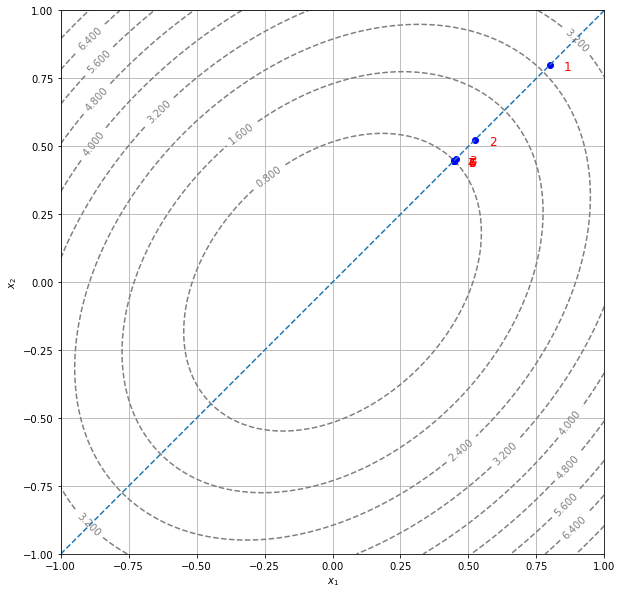

In [4]:
c=0.8

def G(x,y):
    return np.array([f1(x,y)-c,x-y])


res=Newton(G,c,c)
print(res,f1(res[0],res[1]))


display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.plot(Pointsx,Pointsy,'bo')
i=1
for x, y in zip(Pointsx, Pointsy):
    plt.text(x+0.05, y-0.02, str(i), color="red", fontsize=12)
    i+=1


plt.plot([-1,1],[-1,1],'--')
plt.show()



On observe la convergence ultra-rapide typique de la méthode de Newton

## Tâche 3


On cherche une solution telle que
$\begin{cases}
f(x_0,y_0)=f(x_1,y_1)=c \\
d((x_0,y_0),(x_1,y_1))=\sqrt{(x_0-x_1)^2+(y_0-y_1)^2}=\delta
\end{cases}$

Cela veut dire trouver un zéro de la fonction $\begin{array}{ccccc}
H_0 & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
 & & (x,y) & \mapsto & (f(x,y)-c , \sqrt{(x_0-x)^2+(y_0-y)^2}-\delta) \\
\end{array}$

Plus la contrainte d'aller "à droite" par rapport à  $\nabla f(x_0, y_0)$ 



L'idée est de choisir comme point de départ, l'intersection de la demi-droite allant 'à droite' perpendiculairement à $\nabla f(x_0, y_0)$  et du cercle de rayon $\delta$

In [5]:
#fonction pour trouver le point "ortho" éloigné de delta, orthogonalement au gradient, à droite, du point (x0,y0)
def intersectiondroite(f,x0,y0,delta):
    grad_f = grad(f)
    g=grad_f(x0, y0)
    new_norme=delta/np.sqrt(g[0]**2+g[1]**2)
    ortho=[g[1]*new_norme,-g[0]*new_norme]
    return (x0+ortho[0],y0+ortho[1])

#test
intersectiondroite(f1,0.6,0.6,2)

(2.014213562373095, -0.8142135623730952)

Il n'y a aucune garantie que cet algorithme nous envoie bien sur le point qu'on souhaite trouver. On peut envisager des cas pathologiques. (Par exemple à la sortie d'un bout de courbe de niveau en forme de U

In [6]:
def level_curve(f, x0, y0, N=1000, delta=0.1, eps=eps):
    res=np.zeros((2,N))
    c=f(x0,y0)
    for i in range (N):
        def T3(x,y):
            return np.array([f(x,y)-c,(x0-x)**2+(y0-y)**2-delta**2])
        x1,y1=intersectiondroite(f,x0,y0,delta)
        x2,y2=Newton(T3,x1,y1,eps)
        res[0][i],res[1][i]=x0,y0
        x0,y0=x2,y2
    return res


## Essai avec des exemples de référence
#### Avec la fonction f1

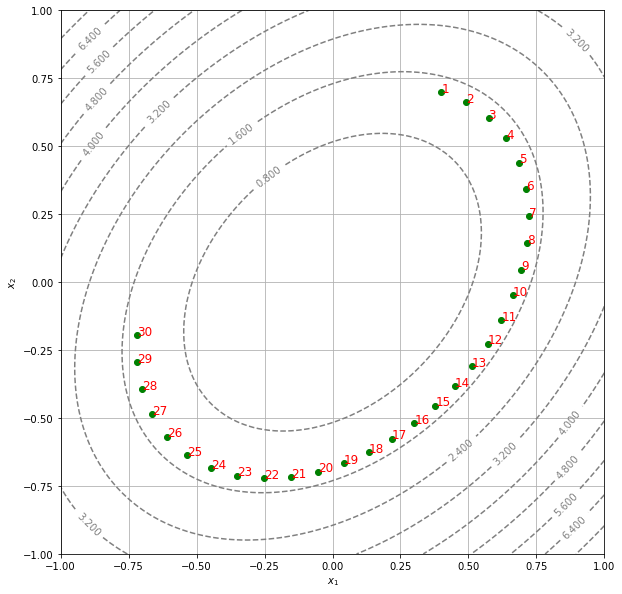

In [7]:
LC1=level_curve(f1, 0.4,0.7, 30)


display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.plot(LC1[0],LC1[1],'bo',color='green')
i=1
for x, y in zip(LC1[0], LC1[1]):
    plt.text(x, y, str(i), color="red", fontsize=12)
    i+=1
plt.show()

#### Avec la fonction f2

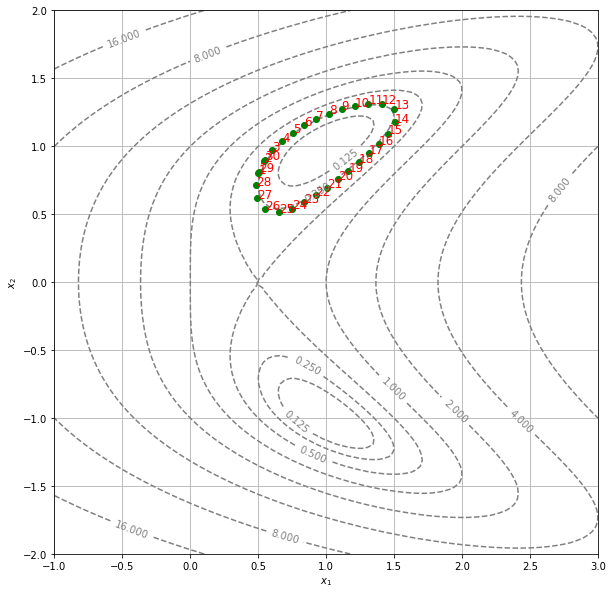

In [8]:
LC2=level_curve(f2, 0.5,0.8,30)

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)



plt.plot(LC2[0],LC2[1],'bo',color='green')
i=1
for x, y in zip(LC2[0], LC2[1]):
    plt.text(x, y, str(i), color="red", fontsize=12)
    i+=1
plt.show()

L'algorithme semble satisfaisant sur les premiers cas simples, mais on voit sur le deuxième exemple qu'il "se repète"

## Tâche 4

Voici le problème dont l'énoncé parle: si on laisse 1000 itérations, l'algorithme fait beaucoup de tours de la même courbe de niveau

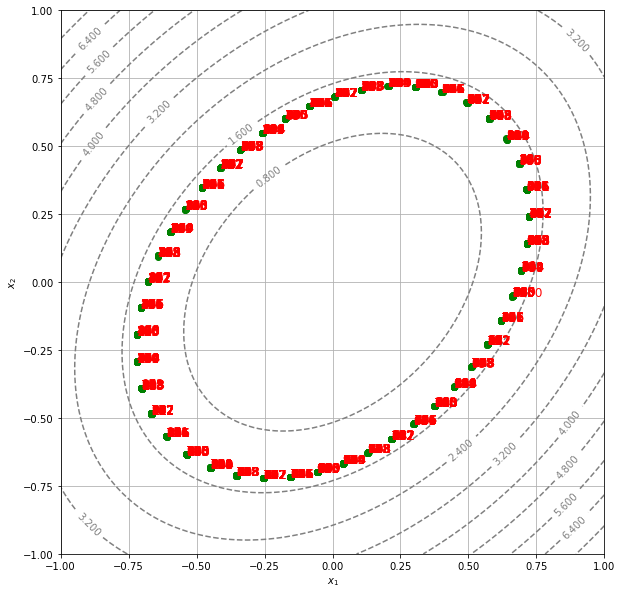

In [9]:
LC1=level_curve(f1, 0.4,0.7)


display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.plot(LC1[0],LC1[1],'bo',color='green')
i=1
for x, y in zip(LC1[0], LC1[1]):
    plt.text(x, y, str(i), color="red", fontsize=12)
    i+=1
plt.show()

En considérant qu'on est dans des cas pas trop pathologiques, on va arrêter l'algorithme lorsque l'on est de nouveau proche du point d'origine (de distance inférieure à $\delta$)

In [10]:
delta=0.1
def level_curve2(f, x0, y0, N=1000, delta=delta, eps=eps):
    res=np.zeros((2,N))
    c=f(x0,y0)
    xinit,yinit=x0,y0

    i=0
    while i<2 or (x0-xinit)**2+(y0-yinit)**2>delta**2:
        def T3(x,y):
            return np.array([f(x,y)-c,(x0-x)**2+(y0-y)**2-delta**2])
        x1,y1=intersectiondroite(f,x0,y0,delta)
        x2,y2=Newton(T3,x1,y1,eps)
        res[0][i],res[1][i]=x0,y0
        x0,y0=x2,y2
        i+=1
    res[0][i],res[1][i]=x0,y0
    resf=res[:,:i+1]
    
    return resf

## Tâche 5
### Premiers essais dans des cas non pathologiques
#### Avec f1

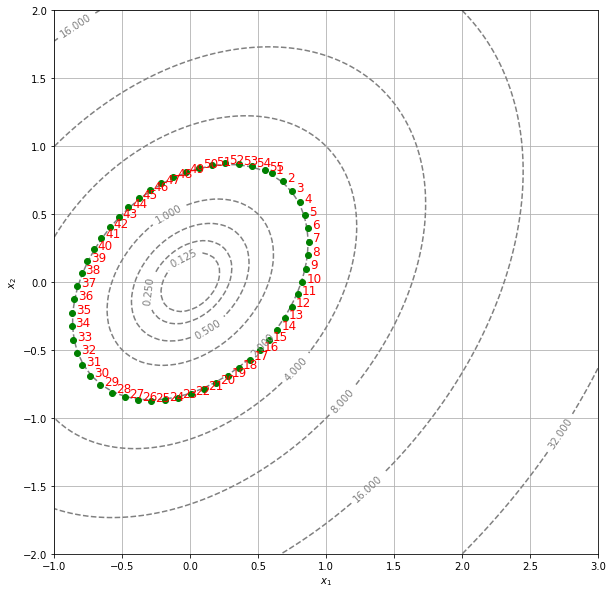

In [11]:
LC21=level_curve2(f1, 0.6,0.8)

display_contour(
    f1, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)



plt.plot(LC21[0],LC21[1],'bo',color='green')
i=1
for x, y in zip(LC21[0], LC21[1]):
    plt.text(x+0.03, y, str(i), color="red", fontsize=12)
    i+=1
plt.show()

#### Avec f2

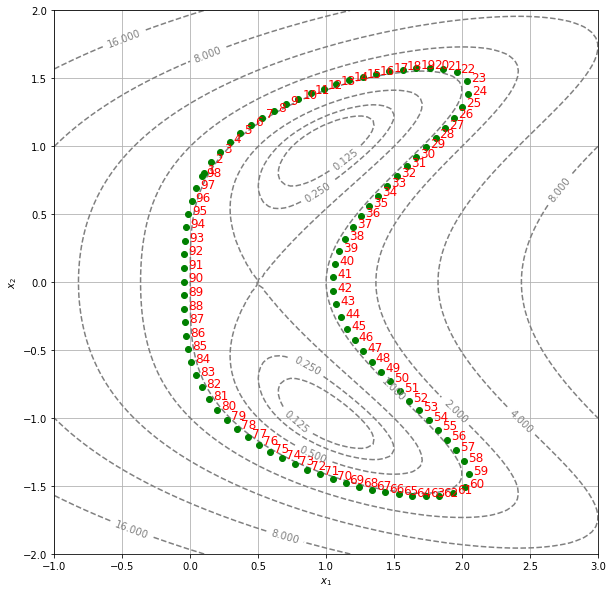

In [12]:
LC22=level_curve2(f2, 0.1,0.8)

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)



plt.plot(LC22[0],LC22[1],'bo',color='green')
i=1
for x, y in zip(LC22[0], LC22[1]):
    plt.text(x+0.03, y, str(i), color="red", fontsize=12)
    i+=1
plt.show()

### Les cas pathologiques
#### 1e problème

Tout d'abord, voici une visualisation de problème des courbes "auto-sécantes". Le résultat oscille autour du point de croisement et y reste bloqué parce que la direction du gradient change brusquement

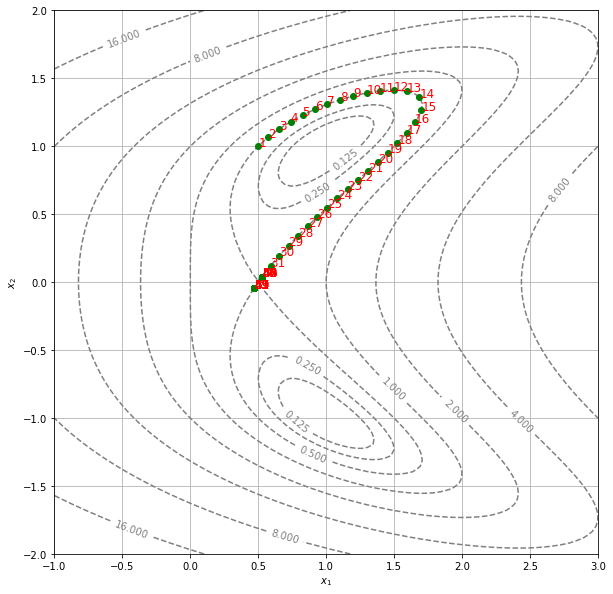

In [13]:
LC2P1=level_curve(f2, 0.5,1.0,60)

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.plot(LC2P1[0],LC2P1[1],'bo',color='green')
i=1
for x, y in zip(LC2P1[0], LC2P1[1]):
    plt.text(x, y, str(i), color="red", fontsize=12)
    i+=1
plt.show()

#### 2e problème

L'algorithme s'arrête à mi-chemin car le premier point est trop proche

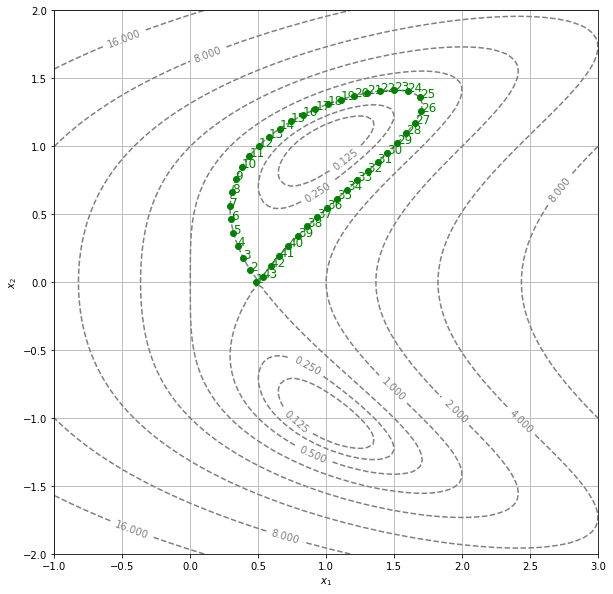

In [14]:
LC2P2=level_curve2(f2, 0.48,0.0)

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.plot(LC2P2[0],LC2P2[1],'bo',color='green')
i=1
for x, y in zip(LC2P2[0], LC2P2[1]):
    plt.text(x, y, str(i), color="green", fontsize=12)
    i+=1
plt.show()

Ces problèmes sont les deux liés à des courbes de niveau qui ne sont pas des lacets simples. Ces cas sont assez rares

# Interpolation
## Question 8

On pose $P_1=(x_1,y_1)$ , $P_2=(x_2,y_2)$ , $u_1=(a_1,b_1)$ et $u_2=(a_2,b_2)$ 

Avec les conditions $\gamma(0) = P_1$ et $\gamma(1) = P_2$  ,on a:

$
\begin{cases}
a=x_1 \\
d=y_1 \\
a+b+c=x_2 \\
d+e+f=y_2 \\
\end{cases}
$

Ensuite, avec $\gamma'(0)$ dans la même direction et le même sens que $u_1$ et idem pour $\gamma'(1)$ avec $u_2$, on a, si $u_1$ et $u_2$ sont non nuls

$
\begin{cases}
\exists \lambda >0, \gamma'(0)=\lambda.u_1  \\
\exists \mu >0, \gamma'(1)=\mu.u_2
\end{cases}
$

On fixe un tel couple $(\lambda,\mu)$

On a ensuite

$
\begin{cases}
b=\lambda.a_1  \\
e=\lambda.b_1  \\
b+2c=\mu.a_2 \\
e+2f=\mu.b_2
\end{cases}
$

D'où on déduit

$
\begin{cases}
a=x_1 \\
b=\lambda.a_1  \\
c=\frac{\mu.a_2-\lambda.a_1}{2} \\
d=y_1 \\
e=\lambda.b_1  \\
f=\frac{\mu.b_2-\lambda.b_1}{2}
\end{cases}
$

Si $u_1$ et $u_2$ sont nuls alors on a

$
\begin{cases}
a=x_1 \\
b=0  \\
c=0 \\
d=y_1 \\
e=0  \\
f=0
\end{cases}
$

# Intégration
## Tâche 7